## 0. Load Packages and Genomes

In [1]:
import sys
import os
import genomearray3 as ga
import numpy as np
import pysam
import Bio.SeqIO as SeqIO
from Bio.Seq import Seq
from scipy import stats
import pandas as pd
import seaborn as sns
import subprocess
#import tables
import regex
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn import linear_model
from matplotlib import ticker
from matplotlib import lines
import mpl_toolkits.axisartist as AA
import matplotlib.patches as patches
from itertools import product
import plotly.express as px

In [2]:
## load genomes (version U00096_2)
mg1655_gbk = SeqIO.read('MG1655.gbk', 'genbank')
mg1655_gbk.description = 'MG1655'
t4_gbk =  SeqIO.read('t4_genome.gb','genbank')
t4_gbk.description = 'T4'
plasmid_gbk = SeqIO.read('pKVS45-ChrisTAC.gb','genbank')
plasmid_gbk.description = 'TAC_plasmid'

mg1655_gt = pd.read_csv('MG1655_gt.csv', index_col=0)
ec_coding_regions = mg1655_gt.loc[mg1655_gt.ncbi_type == 'CDS', ['strand','start','end']].values.astype(int)
ec_coding_mask = ga.regionstomask(ec_coding_regions, len(mg1655_gbk))

t4_gt = pd.read_csv('t4class_gt.csv',index_col=0)
t4_coding_regions = t4_gt.loc[t4_gt.locus_type == 'CDS', ['strand','start','end']].values.astype(int)
t4_coding_mask = ga.regionstomask(t4_coding_regions, len(t4_gbk))

plasmid_gt = pd.read_csv('plasmid_gene_table.csv',index_col=0)
plasmid_coding_regions = plasmid_gt.loc[plasmid_gt.locus_type == 'CDS', ['strand','start','end']].values.astype(int)
plasmid_coding_mask = ga.regionstomask(plasmid_coding_regions, len(plasmid_gbk))

/opt/anaconda3/envs/RNAenv/lib/python3.8/site-packages/Bio/GenBank/Scanner.py:1529: BiopythonParserWarning: Attempting to parse malformed locus line:
'LOCUS       pKVS45-ChrisTAC        6330 bp DNA     circular SYN 09-AUG-2022\n'
Found locus 'pKVS45-ChrisTAC' size '6330' residue_type 'DNA'
Some fields may be wrong.
  warnings.warn(


In [3]:
t4_gene_names = t4_gt.index[t4_gt.locus_type == 'CDS'].values.astype(str)
t4_all_names = t4_gt.index[:].values.astype(str)
t4_all_regions = t4_gt.loc[:, ['strand','start','end']].values.astype(int)

In [4]:
ec_gene_names = mg1655_gt.index[mg1655_gt.ncbi_type == 'CDS'].values.astype(str)
ec_all_names = mg1655_gt.index[:].values.astype(str)
ec_all_regions = mg1655_gt.loc[:, ['strand','start','end']].values.astype(int)

In [5]:
plasmid_gene_names = plasmid_gt.index[plasmid_gt.locus_type == 'CDS'].values.astype(str)
plasmid_all_names = plasmid_gt.index[:].values.astype(str)
plasmid_all_regions = plasmid_gt.loc[:, ['strand','start','end']].values.astype(int)

## 1. Load Numpy Arrays

Rep. A:

In [6]:
path = '/Volumes/CRDExternal/RNAseq/230130/'

array_paths = [[path+'230130_CmdTAC_0min_mg1655.npy', path+'230130_CmdTAC_0min_T4.npy',],
               [path+'230130_CmdTAC_15min_mg1655.npy', path+'230130_CmdTAC_15min_T4.npy',],
               [path+'230130_CmdTAC_30min_mg1655.npy', path+'230130_CmdTAC_30min_T4.npy',],
               [path+'230130_EV_0min_mg1655.npy', path+'230130_EV_0min_T4.npy',],
               [path+'230130_EV_15min_mg1655.npy', path+'230130_EV_15min_T4.npy',],
               [path+'230130_EV_30min_mg1655.npy', path+'230130_EV_30min_T4.npy',],]

normalized_output = ga.loadarrays2d(array_paths, multi_regions = [ec_coding_regions, t4_coding_regions],
                                 normalization=ga.regionsumnormalization2d, log2=True)

[[CmdTAC_t0_Ecoli_A, CmdTAC_t0_T4_A,],
 [CmdTAC_t15_Ecoli_A, CmdTAC_t15_T4_A,],
 [CmdTAC_t30_Ecoli_A, CmdTAC_t30_T4_A,],
 [EV_t0_Ecoli_A, EV_t0_T4_A,],
 [EV_t15_Ecoli_A, EV_t15_T4_A,],
 [EV_t30_Ecoli_A, EV_t30_T4_A,]] = normalized_output

Rep. B:

In [7]:
path = '/Volumes/CRDExternal/RNAseq/230505_rerun/'

array_paths = [[path+'230505_CmdTAC_0min_mg1655.npy', path+'230505_CmdTAC_0min_T4.npy',],
               [path+'230505_CmdTAC_15min_mg1655.npy', path+'230505_CmdTAC_15min_T4.npy',],
               [path+'230505_CmdTAC_30min_mg1655.npy', path+'230505_CmdTAC_30min_T4.npy',],
               [path+'230505_EV_0min_mg1655.npy', path+'230505_EV_0min_T4.npy',],
               [path+'230505_EV_15min_mg1655.npy', path+'230505_EV_15min_T4.npy',],
               [path+'230505_EV_30min_mg1655.npy', path+'230505_EV_30min_T4.npy',],
              [path+'230505_CmdTmAC_0min_mg1655.npy', path+'230505_CmdTmAC_0min_T4.npy',],
              [path+'230505_CmdTmAC_15min_mg1655.npy', path+'230505_CmdTmAC_15min_T4.npy',],
              [path+'230505_CmdTmAC_30min_mg1655.npy', path+'230505_CmdTmAC_30min_T4.npy',]]

normalized_output = ga.loadarrays2d(array_paths, multi_regions = [ec_coding_regions, t4_coding_regions],
                                 normalization=ga.regionsumnormalization2d, log2=True)

[[CmdTAC_t0_Ecoli_B, CmdTAC_t0_T4_B,],
 [CmdTAC_t15_Ecoli_B, CmdTAC_t15_T4_B,],
 [CmdTAC_t30_Ecoli_B, CmdTAC_t30_T4_B,],
[EV_t0_Ecoli_B, EV_t0_T4_B,],
 [EV_t15_Ecoli_B, EV_t15_T4_B,],
 [EV_t30_Ecoli_B, EV_t30_T4_B,],
[CmdTmAC_t0_Ecoli_B, CmdTmAC_t0_T4_B,],
 [CmdTmAC_t15_Ecoli_B, CmdTmAC_t15_T4_B,],
 [CmdTmAC_t30_Ecoli_B, CmdTmAC_t30_T4_B,]] = normalized_output

## PCA

In [8]:
from sklearn.decomposition import PCA
X = pd.DataFrame(data={'TAC_0_A':list(CmdTAC_t0_T4_A[0])+list(CmdTAC_t0_T4_A[1]),
                    'TAC_15_A':list(CmdTAC_t15_T4_A[0])+list(CmdTAC_t15_T4_A[1]),
                    'TAC_30_A':list(CmdTAC_t30_T4_A[0])+list(CmdTAC_t30_T4_A[1]),
                    'EV_0_A':list(EV_t0_T4_A[0])+list(EV_t0_T4_A[1]),
                    'EV_15_A':list(EV_t15_T4_A[0])+list(EV_t15_T4_A[1]),
                    'EV_30_A':list(EV_t30_T4_A[0])+list(EV_t30_T4_A[1]),
                    'TAC_0_B':list(CmdTAC_t0_T4_B[0])+list(CmdTAC_t0_T4_B[1]),
                    'TAC_15_B':list(CmdTAC_t15_T4_B[0])+list(CmdTAC_t15_T4_B[1]),
                    'TAC_30_B':list(CmdTAC_t30_T4_B[0])+list(CmdTAC_t30_T4_B[1]),
                    'EV_0_B':list(EV_t0_T4_B[0])+list(EV_t0_T4_B[1]),
                    'EV_15_B':list(EV_t15_T4_B[0])+list(EV_t15_T4_B[1]),
                    'EV_30_B':list(EV_t30_T4_B[0])+list(EV_t30_T4_B[1]),
                    'TmAC_0':list(CmdTmAC_t0_T4_B[0])+list(CmdTmAC_t0_T4_B[1]),
                    'TmAC_15':list(CmdTmAC_t15_T4_B[0])+list(CmdTmAC_t15_T4_B[1]),
                    'TmAC_30':list(CmdTmAC_t30_T4_B[0])+list(CmdTmAC_t30_T4_B[1])})
X = X.transpose()


In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.79919707 0.17824426]


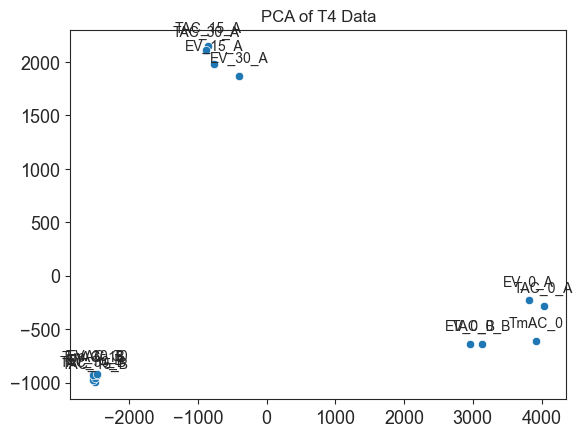

In [10]:
sns.scatterplot(x=X_PCA[:,0],y=X_PCA[:,1])
labels = X.index


# Label the points with values from 'labels'
for i, label in enumerate(labels):
    plt.annotate(label, (X_PCA[:,0][i], X_PCA[:,1][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.title('PCA of T4 Data')
plt.show()

## Gp23

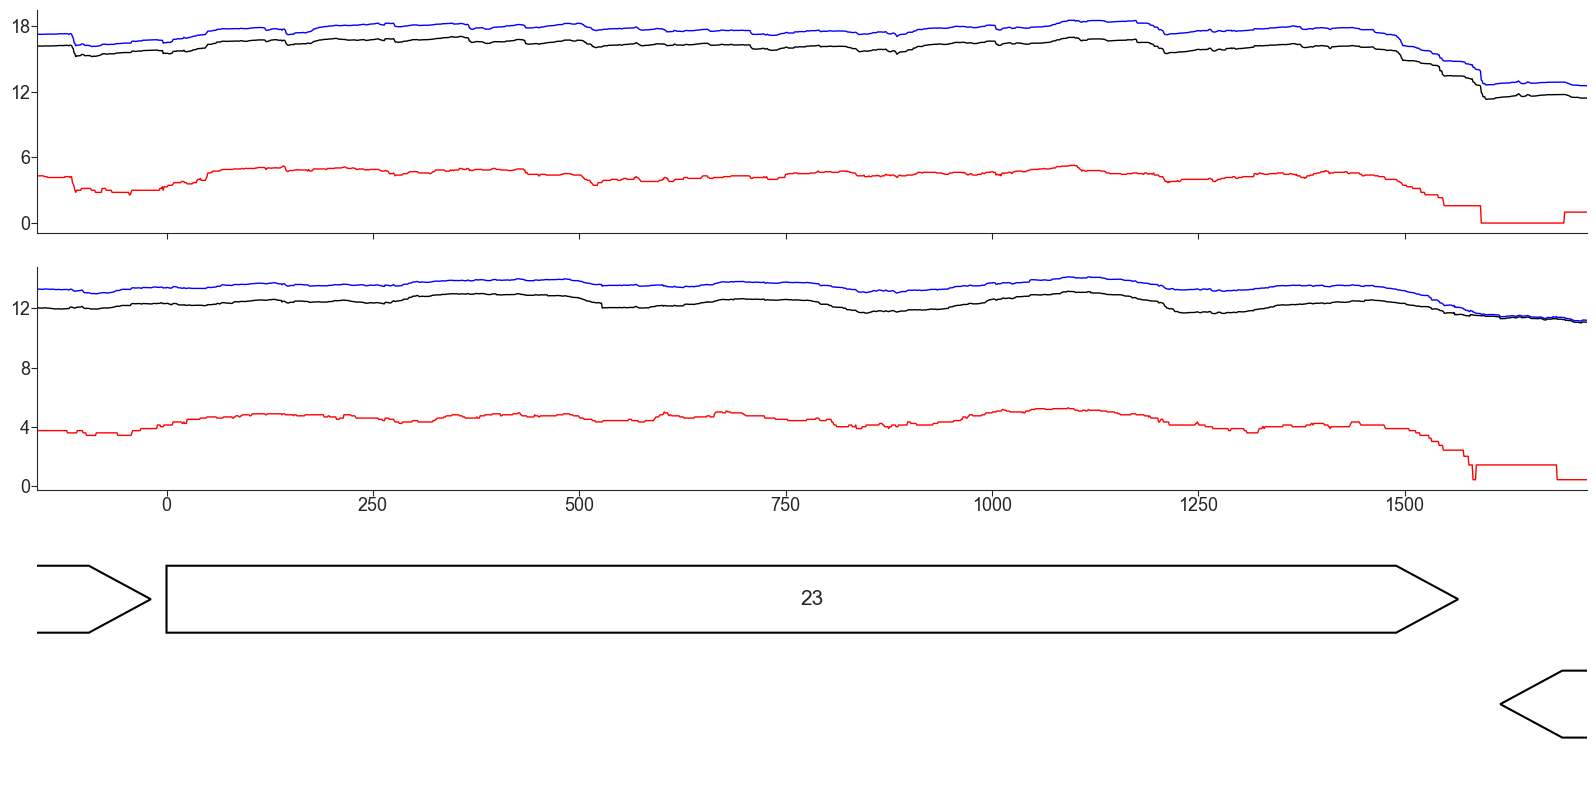

In [8]:
#Normalized Data
plots = ga.plot.RegionPlot(t4_all_names, t4_all_regions, 2, True, (20,10))
plots.setPosition_gene('23')

plots.plotLine(axis_n=0, data=CmdTAC_t0_T4_A, color='r', alpha=1, lw=1)
plots.plotLine(axis_n=0, data=CmdTAC_t15_T4_A, color='k', alpha=1, lw=1)
plots.plotLine(axis_n=0, data=CmdTAC_t30_T4_A, color='b', alpha=1, lw=1)

plots.plotLine(axis_n=1, data=CmdTAC_t0_T4_B, color='r', alpha=1, lw=1)
plots.plotLine(axis_n=1, data=CmdTAC_t15_T4_B, color='k', alpha=1, lw=1)
plots.plotLine(axis_n=1, data=CmdTAC_t30_T4_B, color='b', alpha=1, lw=1)

## RPKM Calculations

In [9]:
path = '/Volumes/CRDExternal/RNAseq/230130/'

array_paths = [[path+'230130_CmdTAC_0min_mg1655.npy', path+'230130_CmdTAC_0min_T4.npy',],
               [path+'230130_CmdTAC_15min_mg1655.npy', path+'230130_CmdTAC_15min_T4.npy',],
               [path+'230130_CmdTAC_30min_mg1655.npy', path+'230130_CmdTAC_30min_T4.npy',],
               [path+'230130_EV_0min_mg1655.npy', path+'230130_EV_0min_T4.npy',],
               [path+'230130_EV_15min_mg1655.npy', path+'230130_EV_15min_T4.npy',],
               [path+'230130_EV_30min_mg1655.npy', path+'230130_EV_30min_T4.npy',],]

output = ga.loadarrays2d(array_paths, multi_regions = [ec_coding_regions, t4_coding_regions])

[[rCmdTAC_t0_Ecoli_A, rCmdTAC_t0_T4_A,],
 [rCmdTAC_t15_Ecoli_A, rCmdTAC_t15_T4_A,],
 [rCmdTAC_t30_Ecoli_A, rCmdTAC_t30_T4_A,],
 [rEV_t0_Ecoli_A, rEV_t0_T4_A,],
 [rEV_t15_Ecoli_A, rEV_t15_T4_A,],
 [rEV_t30_Ecoli_A, rEV_t30_T4_A,]] = output

In [10]:
path = '/Volumes/CRDExternal/RNAseq/230505_rerun/'

array_paths = [[path+'230505_CmdTAC_0min_mg1655.npy', path+'230505_CmdTAC_0min_T4.npy',],
               [path+'230505_CmdTAC_15min_mg1655.npy', path+'230505_CmdTAC_15min_T4.npy',],
               [path+'230505_CmdTAC_30min_mg1655.npy', path+'230505_CmdTAC_30min_T4.npy',],
               [path+'230505_EV_0min_mg1655.npy', path+'230505_EV_0min_T4.npy',],
               [path+'230505_EV_15min_mg1655.npy', path+'230505_EV_15min_T4.npy',],
               [path+'230505_EV_30min_mg1655.npy', path+'230505_EV_30min_T4.npy',],
              [path+'230505_CmdTmAC_0min_mg1655.npy', path+'230505_CmdTmAC_0min_T4.npy',],
              [path+'230505_CmdTmAC_15min_mg1655.npy', path+'230505_CmdTmAC_15min_T4.npy',],
              [path+'230505_CmdTmAC_30min_mg1655.npy', path+'230505_CmdTmAC_30min_T4.npy',]]

output = ga.loadarrays2d(array_paths, multi_regions = [ec_coding_regions, t4_coding_regions])

[[rCmdTAC_t0_Ecoli_B, rCmdTAC_t0_T4_B,],
 [rCmdTAC_t15_Ecoli_B, rCmdTAC_t15_T4_B,],
 [rCmdTAC_t30_Ecoli_B, rCmdTAC_t30_T4_B,],
[rEV_t0_Ecoli_B, rEV_t0_T4_B,],
 [rEV_t15_Ecoli_B, rEV_t15_T4_B,],
 [rEV_t30_Ecoli_B, rEV_t30_T4_B,],
[rCmdTmAC_t0_Ecoli_B, rCmdTmAC_t0_T4_B,],
 [rCmdTmAC_t15_Ecoli_B, rCmdTmAC_t15_T4_B,],
 [rCmdTmAC_t30_Ecoli_B, rCmdTmAC_t30_T4_B,]] = output

In [11]:
path_A='/Volumes/CRDExternal/RNAseq/230130/'
path_B='/Users/chrisdoering/Documents/ChrisProject/RNAseq/230505_rerun/'
bam_paths = [path_A+'230130_CmdTAC_15min.bam',path_A+'230130_EV_15min.bam',
             path_B+'230505_CmdTAC_15min.bam',path_B+'230505_EV_15min.bam',
             path_A+'230130_CmdTAC_30min.bam',path_A+'230130_EV_30min.bam',
             path_B+'230505_CmdTAC_30min.bam',path_B+'230505_EV_30min.bam']


counts = []
for path in bam_paths:
    counts.append(pysam.Samfile(path, 'rb').mapped)
counts = np.asarray(counts)
CPM = counts*(10**-6)
[CmdTAC_CPM_15_A,EV_CPM_15_A,
CmdTAC_CPM_15_B,EV_CPM_15_B,
 CmdTAC_CPM_30_A,EV_CPM_30_A,
CmdTAC_CPM_30_B,EV_CPM_30_B] = CPM

In [13]:
def calculate_RPKM(strand,start,end,mapped_reads,CPM):
    RPM = np.sum(mapped_reads[strand][int(start):int(end)+1])/CPM
    RPKM = RPM/((end-start)/1000)
    return RPKM

TAC_RPKM_A_all_15 = []
EV_RPKM_A_all_15 = []
TAC_RPKM_B_all_15 = []
EV_RPKM_B_all_15 = []

TAC_RPKM_A_all_30 = []
EV_RPKM_A_all_30 = []
TAC_RPKM_B_all_30 = []
EV_RPKM_B_all_30 = []

for index, row in t4_gt.iterrows():
    #15 minute timepoint
    #Replicate A
    TAC_RPKM_A_15 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t15_T4_A,CmdTAC_CPM_15_A)
    TAC_RPKM_A_all_15.append(TAC_RPKM_A_15)
    
    EV_RPKM_A_15 = calculate_RPKM(row.strand,row.start,row.end,rEV_t15_T4_A,EV_CPM_15_A)
    EV_RPKM_A_all_15.append(EV_RPKM_A_15)

    #Replicate B
    TAC_RPKM_B_15 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t15_T4_B,CmdTAC_CPM_15_B)
    TAC_RPKM_B_all_15.append(TAC_RPKM_B_15)
    
    EV_RPKM_B_15 = calculate_RPKM(row.strand,row.start,row.end,rEV_t15_T4_B,EV_CPM_15_B)
    EV_RPKM_B_all_15.append(EV_RPKM_B_15)

    EV_t15_T4_A_RPM = rEV_t15_T4_A/EV_CPM_15_A
    EV_t15_T4_B_RPM = rEV_t15_T4_B/EV_CPM_15_B


    #30 minute timepoint
    #Replicate A
    TAC_RPKM_A_30 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t30_T4_A,CmdTAC_CPM_30_A)
    TAC_RPKM_A_all_30.append(TAC_RPKM_A_30)
    
    EV_RPKM_A_30 = calculate_RPKM(row.strand,row.start,row.end,rEV_t30_T4_A,EV_CPM_30_A)
    EV_RPKM_A_all_30.append(EV_RPKM_A_30)
    
    
    #Replicate B
    TAC_RPKM_B_30 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t30_T4_B,CmdTAC_CPM_30_B)
    TAC_RPKM_B_all_30.append(TAC_RPKM_B_30)
    
    EV_RPKM_B_30 = calculate_RPKM(row.strand,row.start,row.end,rEV_t30_T4_B,EV_CPM_30_B)
    EV_RPKM_B_all_30.append(EV_RPKM_B_30)
    
    EV_t30_T4_A_RPM = rEV_t30_T4_A/EV_CPM_30_A
    EV_t30_T4_B_RPM = rEV_t30_T4_B/EV_CPM_30_B
    

t4_RPKM = t4_gt.copy()
t4_RPKM['TAC RPKM A 15min'] = TAC_RPKM_A_all_15
t4_RPKM['EV RPKM A 15min'] = EV_RPKM_A_all_15

t4_RPKM['TAC RPKM B 15min'] = TAC_RPKM_B_all_15
t4_RPKM['EV RPKM B 15min'] = EV_RPKM_B_all_15

t4_RPKM['TAC RPKM A 30min'] = TAC_RPKM_A_all_30
t4_RPKM['EV RPKM A 30min'] = EV_RPKM_A_all_30

t4_RPKM['TAC RPKM B 30min'] = TAC_RPKM_B_all_30
t4_RPKM['EV RPKM B 30min'] = EV_RPKM_B_all_30

t4_RPKM

,strand,start,end,locus_type,product,has_intron,is_early,is_delayed_early,is_middle,is_late,downstream_operon_gene,upstream_operon_gene,TAC RPKM A 15min,EV RPKM A 15min,TAC RPKM B 15min,EV RPKM B 15min,TAC RPKM A 30min,EV RPKM A 30min,TAC RPKM B 30min,EV RPKM B 30min
rIIA,1,11,2188,CDS,rIIA protector from prophage-induced early lysis,False,False,False,True,False,False,True,2.547347e+05,19885.781331,204242.149722,58815.922302,1.590524e+05,13777.376196,164902.224819,61942.837729
rIIA.1,1,2199,2402,CDS,rIIA.1 hypothetical protein,False,False,False,True,False,True,False,2.637891e+05,32877.557253,233382.382611,78430.407151,1.714982e+05,21626.495373,185352.428305,84282.340592
60,1,2457,2989,CDS,"gp60 topoisomerase II, large subunit, C-termin...",False,False,False,True,False,False,True,5.919309e+05,69677.018331,294869.409467,112150.842894,3.745126e+05,33404.079206,248901.345591,107764.034428
60.1,1,2970,3350,CDS,gp60.1 hypothetical protein,False,False,False,True,False,True,False,3.167105e+05,45636.309441,194363.619395,76130.970117,1.892600e+05,19554.196892,163037.201443,74360.969536
mobA,1,3653,3766,CDS,MobA homing endonuclease pseudogene,False,False,False,True,False,False,True,1.152832e+05,20010.054808,181617.308270,94033.475761,6.200117e+04,7215.281132,149331.107635,94556.483625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ndd.5,1,166814,166912,CDS,Ndd.5 hypothetical predicted outer membrane pr...,False,False,True,False,False,False,True,3.379722e+04,9372.057160,216326.916866,89073.550971,2.236853e+04,11260.741616,127419.295392,127398.702630
ndd.6,1,166909,166995,CDS,Ndd.6 conserved hypothetical predicted outer m...,False,False,False,False,False,True,True,3.275536e+04,10136.201482,245626.044472,117078.600907,2.381855e+04,8328.282570,149174.762852,161346.201780
denB,1,167102,167659,CDS,DenB DNA endonuclease IV,False,False,False,True,False,True,False,1.601144e+05,16390.362311,127481.340010,62992.377810,9.008181e+04,8864.169764,98011.599870,79236.820386
denB.1,1,167742,167936,CDS,DenB.1 hypothetical protein,False,False,False,True,False,False,True,4.687855e+05,67815.386518,305821.146425,113570.615940,3.650185e+05,33054.833007,256388.773913,94320.007353


In [14]:
EC_TAC_RPKM_A_all_15 = []
EC_EV_RPKM_A_all_15 = []
EC_TAC_RPKM_B_all_15 = []
EC_EV_RPKM_B_all_15 = []

EC_TAC_RPKM_A_all_30 = []
EC_EV_RPKM_A_all_30 = []
EC_TAC_RPKM_B_all_30 = []
EC_EV_RPKM_B_all_30 = []


for index, row in mg1655_gt.iterrows():
    #15 minute timepoint
    #Replicate A
    TAC_RPKM_A_15 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t15_Ecoli_A,CmdTAC_CPM_15_A)
    EC_TAC_RPKM_A_all_15.append(TAC_RPKM_A_15)
    
    EV_RPKM_A_15 = calculate_RPKM(row.strand,row.start,row.end,rEV_t15_Ecoli_A,EV_CPM_15_A)
    EC_EV_RPKM_A_all_15.append(EV_RPKM_A_15)
    
    #Replicate B
    TAC_RPKM_B_15 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t15_Ecoli_B,CmdTAC_CPM_15_B)
    EC_TAC_RPKM_B_all_15.append(TAC_RPKM_B_15)
    
    EV_RPKM_B_15 = calculate_RPKM(row.strand,row.start,row.end,rEV_t15_Ecoli_B,EV_CPM_15_B)
    EC_EV_RPKM_B_all_15.append(EV_RPKM_B_15)


    #30 minute timepoint
    #Replicate A
    TAC_RPKM_A_30 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t30_Ecoli_A,CmdTAC_CPM_30_A)
    EC_TAC_RPKM_A_all_30.append(TAC_RPKM_A_30)
    
    EV_RPKM_A_30 = calculate_RPKM(row.strand,row.start,row.end,rEV_t30_Ecoli_A,EV_CPM_30_A)
    EC_EV_RPKM_A_all_30.append(EV_RPKM_A_30)
    
    #Replicate B
    TAC_RPKM_B_30 = calculate_RPKM(row.strand,row.start,row.end,rCmdTAC_t30_Ecoli_B,CmdTAC_CPM_30_B)
    EC_TAC_RPKM_B_all_30.append(TAC_RPKM_B_30)
    
    EV_RPKM_B_30 = calculate_RPKM(row.strand,row.start,row.end,rEV_t30_Ecoli_B,EV_CPM_30_B)
    EC_EV_RPKM_B_all_30.append(EV_RPKM_B_30)

    


ec_RPKM = mg1655_gt.copy()
ec_RPKM['TAC RPKM A 15min'] = EC_TAC_RPKM_A_all_15
ec_RPKM['EV RPKM A 15min'] = EC_EV_RPKM_A_all_15

ec_RPKM['TAC RPKM B 15min'] = EC_TAC_RPKM_B_all_15
ec_RPKM['EV RPKM B 15min'] = EC_EV_RPKM_B_all_15

ec_RPKM['TAC RPKM A 30min'] = EC_TAC_RPKM_A_all_30
ec_RPKM['EV RPKM A 30min'] = EC_EV_RPKM_A_all_30

ec_RPKM['TAC RPKM B 30min'] = EC_TAC_RPKM_B_all_30
ec_RPKM['EV RPKM B 30min'] = EC_EV_RPKM_B_all_30


ec_RPKM

,start,end,strand,Oname,Osize,O5,O3,ncbi_name,ncbi_type,ncbi_gop,ncbi_goc,TAC RPKM A 15min,EV RPKM A 15min,TAC RPKM B 15min,EV RPKM B 15min,TAC RPKM A 30min,EV RPKM A 30min,TAC RPKM B 30min,EV RPKM B 30min
thrL,189.0,254.0,0,thrLABC,4.0,37.0,5019.0,thrL,CDS,GO:0009088 - threonine biosynthetic process,NaN,2019.496817,2413.334462,714.015381,771.166335,1590.540610,1983.276088,462.314991,638.329937
thrA,336.0,2798.0,0,thrLABC,4.0,37.0,5019.0,thrA,CDS,['GO:0009088 - threonine biosynthetic process'...,['GO:0005737 - cytoplasm'],596.960098,458.685464,918.525733,961.811425,408.343204,498.097415,742.303987,1301.684562
thrB,2800.0,3732.0,0,thrLABC,4.0,37.0,5019.0,thrB,CDS,['GO:0009088 - threonine biosynthetic process'],['GO:0005737 - cytoplasm'],948.319902,677.963496,1292.645456,1400.766781,603.907366,916.932122,1076.716337,1568.024773
thrC,3733.0,5019.0,0,thrLABC,4.0,37.0,5019.0,thrC,CDS,['GO:0009088 - threonine biosynthetic process'],['GO:0005737 - cytoplasm'],968.641781,708.990245,1346.535271,1355.242718,649.601140,901.404421,937.989095,1486.174658
yaaX,5233.0,5529.0,0,yaaX,1.0,5233.0,5529.0,yaaX,CDS,NaN,NaN,500.701746,269.117693,415.002436,565.731733,219.695776,416.655942,447.842865,1049.875893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
creC,4634718.0,4636142.0,0,creABCD,4.0,4633543.0,4637552.0,creC,CDS,['GO:0006464 - protein modification process'],"['GO:0009274 - peptidoglycan-based cell wall',...",210.143413,58.334218,337.533064,410.613449,112.517028,108.114835,395.449270,795.580846
creD,4636200.0,4637552.0,0,creABCD,4.0,4633543.0,4637552.0,creD,CDS,NaN,"['GO:0009274 - peptidoglycan-based cell wall',...",72.083941,43.363917,246.645059,335.905249,27.159353,49.911599,370.289196,799.220808
arcA,4637612.0,4638328.0,1,arcA,1.0,4638448.0,4637612.0,arcA,CDS,['GO:0006350 - transcription'],['GO:0005737 - cytoplasm'],6387.165374,4163.809152,3087.466689,2964.928441,5148.907476,6726.283120,2139.648750,2762.882802
yjjY,4638424.0,4638564.0,0,yjjY,1.0,4638424.0,4638564.0,yjjY,CDS,NaN,NaN,49.268483,43.543511,2321.687765,1712.968768,16.011260,28.090473,1135.340264,1982.334764


In [15]:
t4_RPKM['TAC TPM A 15min'] = (t4_RPKM['TAC RPKM A 15min']/(np.sum(t4_RPKM['TAC RPKM A 15min'])+np.sum(ec_RPKM['TAC RPKM A 15min'])))*1000000
t4_RPKM['TAC TPM B 15min'] = (t4_RPKM['TAC RPKM B 15min']/(np.sum(t4_RPKM['TAC RPKM B 15min'])+np.sum(ec_RPKM['TAC RPKM B 15min'])))*1000000
t4_RPKM['EV TPM A 15min'] = (t4_RPKM['EV RPKM A 15min']/(np.sum(t4_RPKM['EV RPKM A 15min'])+np.sum(ec_RPKM['EV RPKM A 15min'])))*1000000
t4_RPKM['EV TPM B 15min'] = (t4_RPKM['EV RPKM B 15min']/(np.sum(t4_RPKM['EV RPKM B 15min'])+np.sum(ec_RPKM['EV RPKM B 15min'])))*1000000

t4_RPKM['TAC TPM A 30min'] = (t4_RPKM['TAC RPKM A 30min']/(np.sum(t4_RPKM['TAC RPKM A 30min'])+np.sum(ec_RPKM['TAC RPKM A 30min'])))*1000000
t4_RPKM['TAC TPM B 30min'] = (t4_RPKM['TAC RPKM B 30min']/(np.sum(t4_RPKM['TAC RPKM B 30min'])+np.sum(ec_RPKM['TAC RPKM B 30min'])))*1000000
t4_RPKM['EV TPM A 30min'] = (t4_RPKM['EV RPKM A 30min']/(np.sum(t4_RPKM['EV RPKM A 30min'])+np.sum(ec_RPKM['EV RPKM A 30min'])))*1000000
t4_RPKM['EV TPM B 30min'] = (t4_RPKM['EV RPKM B 30min']/(np.sum(t4_RPKM['EV RPKM B 30min'])+np.sum(ec_RPKM['EV RPKM B 30min'])))*1000000


In [16]:
ec_RPKM['TAC TPM A 15min'] = (ec_RPKM['TAC RPKM A 15min']/(np.sum(t4_RPKM['TAC RPKM A 15min'])+np.sum(ec_RPKM['TAC RPKM A 15min'])))*1000000
ec_RPKM['TAC TPM B 15min'] = (ec_RPKM['TAC RPKM B 15min']/(np.sum(t4_RPKM['TAC RPKM B 15min'])+np.sum(ec_RPKM['TAC RPKM B 15min'])))*1000000
ec_RPKM['EV TPM A 15min'] = (ec_RPKM['EV RPKM A 15min']/(np.sum(t4_RPKM['EV RPKM A 15min'])+np.sum(ec_RPKM['EV RPKM A 15min'])))*1000000
ec_RPKM['EV TPM B 15min'] = (ec_RPKM['EV RPKM B 15min']/(np.sum(t4_RPKM['EV RPKM B 15min'])+np.sum(ec_RPKM['EV RPKM B 15min'])))*1000000

ec_RPKM['TAC TPM A 30min'] = (ec_RPKM['TAC RPKM A 30min']/(np.sum(t4_RPKM['TAC RPKM A 30min'])+np.sum(ec_RPKM['TAC RPKM A 30min'])))*1000000
ec_RPKM['TAC TPM B 30min'] = (ec_RPKM['TAC RPKM B 30min']/(np.sum(t4_RPKM['TAC RPKM B 30min'])+np.sum(ec_RPKM['TAC RPKM B 30min'])))*1000000
ec_RPKM['EV TPM A 30min'] = (ec_RPKM['EV RPKM A 30min']/(np.sum(t4_RPKM['EV RPKM A 30min'])+np.sum(ec_RPKM['EV RPKM A 30min'])))*1000000
ec_RPKM['EV TPM B 30min'] = (ec_RPKM['EV RPKM B 30min']/(np.sum(t4_RPKM['EV RPKM B 30min'])+np.sum(ec_RPKM['EV RPKM B 30min'])))*1000000


In [17]:
t4_RPKM['TAC TPM Mean 15min'] = np.mean([t4_RPKM['TAC TPM A 15min'],t4_RPKM['TAC TPM B 15min']],axis=0)
t4_RPKM['EV TPM Mean 15min'] = np.mean([t4_RPKM['EV TPM A 15min'],t4_RPKM['EV TPM B 15min']],axis=0)
t4_RPKM['TAC TPM Mean 30min'] = np.mean([t4_RPKM['TAC TPM A 30min'],t4_RPKM['TAC TPM B 30min']],axis=0)
t4_RPKM['EV TPM Mean 30min'] = np.mean([t4_RPKM['EV TPM A 30min'],t4_RPKM['EV TPM B 30min']],axis=0)

t4_RPKM['TPM Ratio Mean 15min'] = np.log2(t4_RPKM['TAC TPM Mean 15min']/t4_RPKM['EV TPM Mean 15min'])
t4_RPKM['TPM Ratio Mean 30min'] = np.log2(t4_RPKM['TAC TPM Mean 30min']/t4_RPKM['EV TPM Mean 30min'])

In [18]:
condensed_t4 = t4_RPKM[t4_RPKM['locus_type'] == 'CDS'].copy()
timings = t4_RPKM[['is_early','is_delayed_early','is_middle','is_late']].idxmax(1)
timings.name = 'Gene Timing'
condensed_t4 = condensed_t4.join(timings)
condensed_t4.drop_duplicates(inplace=True)
condensed_t4.drop(columns=['is_early', 'is_delayed_early', 'is_middle', 'is_late'], inplace=True)
newnames = {'is_early':'early','is_delayed_early':'delayed early','is_middle':'middle','is_late':'late'}
condensed_t4['Gene Timing'] = condensed_t4['Gene Timing'].map(newnames)
condensed_t4['gene_name'] = condensed_t4.index

condensed_t4

,strand,start,end,locus_type,product,has_intron,downstream_operon_gene,upstream_operon_gene,TAC RPKM A 15min,EV RPKM A 15min,...,EV TPM A 30min,EV TPM B 30min,TAC TPM Mean 15min,EV TPM Mean 15min,TAC TPM Mean 30min,EV TPM Mean 30min,TPM Ratio Mean 15min,TPM Ratio Mean 30min,Gene Timing,gene_name
1,1,74648,75373,CDS,deoxynucleoside monophosphate kinase,False,True,False,883503.290417,614719.075247,...,1757.427916,2603.954093,5827.616693,5259.518883,3333.524901,2180.691004,0.147975,0.612263,middle,1
10,0,88084,89892,CDS,baseplate wedge subunit and tail pin,False,True,True,114567.509795,438063.915521,...,1988.765527,3152.499737,1118.913564,3868.346968,1012.450807,2570.632632,-1.789619,-1.344272,late,10
11,0,89892,90551,CDS,baseplate wedge subunit and tail pin,False,True,True,40517.912786,333905.583911,...,1285.441090,1935.440092,519.620593,2663.551408,553.067572,1610.440591,-2.357821,-1.541928,late,11
12,0,90548,92131,CDS,gp12 Short tail fibers,False,True,True,70477.790630,430989.295937,...,2332.970595,3064.187808,810.977989,3656.926938,895.956509,2698.579201,-2.172897,-1.590699,late,12
13,0,93623,94552,CDS,neck protein,False,True,False,37832.688346,243171.964390,...,504.844962,3506.551558,1029.489936,2992.002423,1065.018565,2005.698260,-1.539182,-0.913226,late,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vs.5,1,63380,63556,CDS,Vs.5 conserved hypothetical protein,False,False,True,435396.423133,312421.499526,...,1502.386260,3513.761338,3684.123832,3870.296084,2282.517530,2508.073799,-0.071122,-0.135954,middle,vs.5
vs.6,1,63556,63918,CDS,Vs.6 conserved hypothetical protein,False,True,True,412713.707554,329596.579229,...,2017.761915,3207.059956,3352.281602,3921.776802,2287.051494,2612.410935,-0.226364,-0.191893,middle,vs.6
vs.7,1,63926,64255,CDS,Vs.7 conserved hypothetical protein,False,True,True,242648.045557,209357.532474,...,786.099391,1786.458285,1997.170441,2371.342444,1288.035575,1286.278838,-0.247747,0.001969,delayed early,vs.7
vs.8,1,64252,64911,CDS,Vs.8 conserved hypothetical protein,False,True,True,475742.490752,543412.135324,...,6796.043815,1980.878608,3207.911779,4389.326690,2265.637404,4388.461212,-0.452365,-0.953798,delayed early,vs.8


In [19]:
gene_order = pd.read_csv('210415_t4_genes_rankedbypeakexpression.csv',header=None,names=['gene_name'])
gene_order['gene_rank'] = gene_order.index
gene_order.set_index('gene_name',inplace=True)
gene_order = gene_order.to_dict()['gene_rank']

In [20]:
rank_list = []
for index, row in condensed_t4.iterrows():
    rank_list.append(gene_order[row['gene_name']])
condensed_t4['rank_order'] = rank_list
condensed_t4

,strand,start,end,locus_type,product,has_intron,downstream_operon_gene,upstream_operon_gene,TAC RPKM A 15min,EV RPKM A 15min,...,EV TPM B 30min,TAC TPM Mean 15min,EV TPM Mean 15min,TAC TPM Mean 30min,EV TPM Mean 30min,TPM Ratio Mean 15min,TPM Ratio Mean 30min,Gene Timing,gene_name,rank_order
1,1,74648,75373,CDS,deoxynucleoside monophosphate kinase,False,True,False,883503.290417,614719.075247,...,2603.954093,5827.616693,5259.518883,3333.524901,2180.691004,0.147975,0.612263,middle,1,209
10,0,88084,89892,CDS,baseplate wedge subunit and tail pin,False,True,True,114567.509795,438063.915521,...,3152.499737,1118.913564,3868.346968,1012.450807,2570.632632,-1.789619,-1.344272,late,10,250
11,0,89892,90551,CDS,baseplate wedge subunit and tail pin,False,True,True,40517.912786,333905.583911,...,1935.440092,519.620593,2663.551408,553.067572,1610.440591,-2.357821,-1.541928,late,11,216
12,0,90548,92131,CDS,gp12 Short tail fibers,False,True,True,70477.790630,430989.295937,...,3064.187808,810.977989,3656.926938,895.956509,2698.579201,-2.172897,-1.590699,late,12,251
13,0,93623,94552,CDS,neck protein,False,True,False,37832.688346,243171.964390,...,3506.551558,1029.489936,2992.002423,1065.018565,2005.698260,-1.539182,-0.913226,late,13,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vs.5,1,63380,63556,CDS,Vs.5 conserved hypothetical protein,False,False,True,435396.423133,312421.499526,...,3513.761338,3684.123832,3870.296084,2282.517530,2508.073799,-0.071122,-0.135954,middle,vs.5,172
vs.6,1,63556,63918,CDS,Vs.6 conserved hypothetical protein,False,True,True,412713.707554,329596.579229,...,3207.059956,3352.281602,3921.776802,2287.051494,2612.410935,-0.226364,-0.191893,middle,vs.6,173
vs.7,1,63926,64255,CDS,Vs.7 conserved hypothetical protein,False,True,True,242648.045557,209357.532474,...,1786.458285,1997.170441,2371.342444,1288.035575,1286.278838,-0.247747,0.001969,delayed early,vs.7,104
vs.8,1,64252,64911,CDS,Vs.8 conserved hypothetical protein,False,True,True,475742.490752,543412.135324,...,1980.878608,3207.911779,4389.326690,2265.637404,4388.461212,-0.452365,-0.953798,delayed early,vs.8,174


In [23]:
np.max(condensed_t4['TPM Ratio Mean 15min']),np.max(condensed_t4['TPM Ratio Mean 30min'])

(2.3072729417616493, 2.827606524150666)

In [25]:
np.min(condensed_t4['TPM Ratio Mean 15min']),np.min(condensed_t4['TPM Ratio Mean 30min'])

(-2.9268322282867385, -3.6195696816665737)

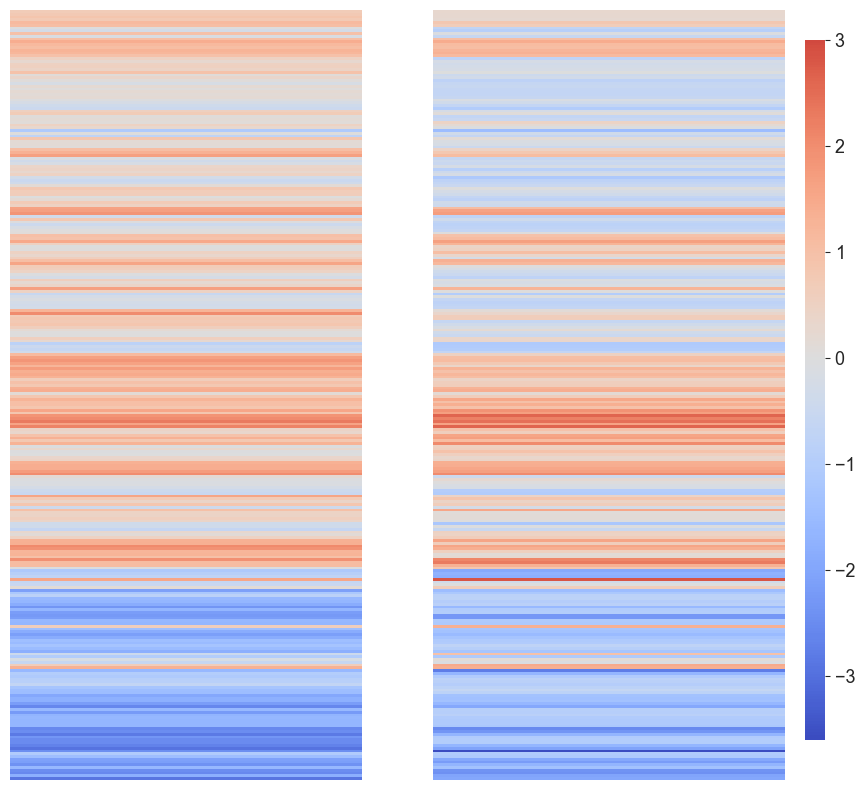

In [22]:
colormap = plt.get_cmap('coolwarm')
colormap.set_bad(color='w')
fig,ax = plt.subplots(1, 2, figsize=(10,10))
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

condensed_t4 = condensed_t4.sort_values("rank_order")

sns.heatmap(condensed_t4[['TPM Ratio Mean 15min']],vmax = 3,vmin=-3.6,
                      center = 0,cmap = colormap,xticklabels = False,yticklabels = False,ax=ax[0],cbar_ax=cbar_ax)

sns.heatmap(condensed_t4[['TPM Ratio Mean 30min']],vmax = 3,vmin=-3.6,
                      center = 0,cmap = colormap,xticklabels = False,yticklabels = False,ax=ax[1],cbar_ax=cbar_ax)
plt.savefig('TPM_Ratio_HeatMap_T4GeneTiming_15min_30min.svg')

### For GEO Submission

In [26]:
condensed_t4

,strand,start,end,locus_type,product,has_intron,downstream_operon_gene,upstream_operon_gene,TAC RPKM A 15min,EV RPKM A 15min,...,EV TPM B 30min,TAC TPM Mean 15min,EV TPM Mean 15min,TAC TPM Mean 30min,EV TPM Mean 30min,TPM Ratio Mean 15min,TPM Ratio Mean 30min,Gene Timing,gene_name,rank_order
39.2,1,5701,5838,CDS,gp39.2 hypothetical protein,False,True,True,149963.180050,31056.131893,...,2848.035699,2663.353516,1661.856769,2000.064207,1623.138769,0.680448,0.301260,early,39.2,1
goF,1,5841,6266,CDS,goF mRNA metabolism modulator,False,True,True,242266.042422,42922.480547,...,3631.337396,3649.404663,2129.584747,2528.722895,2126.283773,0.777089,0.250075,early,goF,2
cef,1,6266,6481,CDS,cef modifier of suppressor tRNAs,False,True,False,162033.832368,45118.666938,...,2662.101096,3063.361372,1664.778561,2003.975638,1685.413861,0.879785,0.249762,early,cef,3
motB,1,6652,7140,CDS,MotB modifier of transcription,False,False,False,273919.925624,42096.188520,...,4146.822267,3969.991784,2355.251169,2695.560702,2321.116937,0.753255,0.215766,early,motB,4
motB.1,1,7290,7649,CDS,MotB.1 hypothetical protein,False,False,True,247552.843536,35796.421205,...,1904.430316,2760.832114,1262.655984,2046.482656,1154.080201,1.128642,0.826403,early,motB.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0,154686,155804,CDS,"gp35 hinge connector of long tail fiber, proxi...",False,False,True,22015.149512,139273.755869,...,1884.469267,529.492770,1580.062273,524.022285,1319.705141,-1.577299,-1.332516,late,35,274
36,0,155867,156532,CDS,"gp36 hinge connector of long tail fiber, dista...",False,True,False,73498.612586,522426.854825,...,2890.203316,732.172983,4080.119026,807.562287,4200.106638,-2.478355,-2.378781,late,36,275
37,0,156541,159621,CDS,"gp37 long tail fiber, distal subunit",False,True,True,53901.544960,484255.486394,...,3348.447482,658.741813,3875.811133,810.507125,4358.679307,-2.556713,-2.426994,late,37,276
38,0,159648,160199,CDS,gp38 distal long tail fiber assembly catalyst,False,True,True,21490.101815,306534.094324,...,4210.674161,918.071515,3210.346588,910.194110,3741.525643,-1.806051,-2.039381,late,38,277


In [35]:
T4_tpm_RNAseq = condensed_t4[['gene_name','TAC TPM A 15min','TAC TPM A 30min','EV TPM A 15min','EV TPM A 30min','TAC TPM B 15min','TAC TPM B 30min','EV TPM B 15min','EV TPM B 30min']].copy()
T4_tpm_RNAseq.rename({'TAC TPM A 15min':'cmdTAC_15min_rep1','TAC TPM A 30min':'cmdTAC_30min_rep1',
                      'EV TPM A 15min':'ev_15min_rep1','EV TPM A 30min':'ev_30min_rep1',
                      'TAC TPM B 15min':'cmdTAC_15min_rep2','TAC TPM B 30min':'cmdTAC_30min_rep2',
                      'EV TPM B 15min':'ev_15min_rep1','EV TPM B 30min':'ev_30min_rep1',},axis='columns',inplace=True)
T4_tpm_RNAseq

,gene_name,cmdTAC_15min_rep1,cmdTAC_30min_rep1,ev_15min_rep1,ev_30min_rep1,cmdTAC_15min_rep2,cmdTAC_30min_rep2,ev_15min_rep1,ev_30min_rep1
39.2,39.2,1352.095201,614.805365,367.406719,398.241839,3974.611831,3385.323049,2956.306818,2848.035699
goF,goF,2184.314531,972.298629,507.790468,621.230150,5114.494796,4085.147160,3751.379026,3631.337396
cef,cef,1460.926389,709.093195,533.772250,708.726627,4665.796355,3298.858081,2795.784872,2662.101096
motB,motB,2469.711676,904.806170,498.015096,495.411608,5470.271892,4486.315234,4212.487242,4146.822267
motB.1,motB.1,2231.981287,1082.854553,423.486277,403.730085,3289.682940,3010.110760,2101.825691,1904.430316
...,...,...,...,...,...,...,...,...,...
35,35,198.492577,172.880944,1647.665392,754.941016,860.492963,875.163626,1512.459155,1884.469267
36,36,662.676807,732.204525,6180.522978,5510.009961,801.669158,882.920049,1979.715075,2890.203316
37,37,485.986095,589.973255,5728.940105,5368.911132,831.497531,1031.040994,2022.682160,3348.447482
38,38,193.758651,242.755300,3626.423481,3272.377125,1642.384379,1577.632919,2794.269695,4210.674161


In [36]:
T4_tpm_RNAseq.to_csv('/Volumes/CRDExternal/GEOSubmission/RNA-seq/rnaseq_t4_tpm.csv',index=False)

In [37]:
EC_tpm_RNAseq = ec_RPKM[['ncbi_name','TAC TPM A 15min','TAC TPM A 30min','EV TPM A 15min','EV TPM A 30min','TAC TPM B 15min','TAC TPM B 30min','EV TPM B 15min','EV TPM B 30min']].copy()
EC_tpm_RNAseq.rename({'TAC TPM A 15min':'cmdTAC_15min_rep1','TAC TPM A 30min':'cmdTAC_30min_rep1',
                      'EV TPM A 15min':'ev_15min_rep1','EV TPM A 30min':'ev_30min_rep1',
                      'TAC TPM B 15min':'cmdTAC_15min_rep2','TAC TPM B 30min':'cmdTAC_30min_rep2',
                      'EV TPM B 15min':'ev_15min_rep1','EV TPM B 30min':'ev_30min_rep1',},axis='columns',inplace=True)
EC_tpm_RNAseq

,ncbi_name,cmdTAC_15min_rep1,cmdTAC_30min_rep1,ev_15min_rep1,ev_30min_rep1,cmdTAC_15min_rep2,cmdTAC_30min_rep2,ev_15min_rep1,ev_30min_rep1
thrL,thrL,18.208149,9.073804,28.550732,23.050352,11.956885,8.240605,19.687408,14.609386
thrA,thrA,5.382300,2.329539,5.426436,5.789068,15.381611,13.231313,24.554461,29.791510
thrB,thrB,8.550224,3.445204,8.020585,10.656917,21.646612,19.192098,35.760724,35.887208
thrC,thrC,8.733450,3.705880,8.387644,10.476448,22.549049,16.719332,34.598523,34.013914
yaaX,yaaX,4.514418,1.253333,3.183772,4.842526,6.949621,7.982645,14.442787,24.028393
...,...,...,...,...,...,...,...,...,...
creC,creC,1.894691,0.641893,0.690118,1.256550,5.652321,7.048747,10.482712,18.208370
creD,creD,0.649922,0.154940,0.513013,0.580091,4.130313,6.600277,8.575457,18.291678
arcA,arcA,57.587840,29.373771,49.259562,78.175294,51.702647,38.138501,75.692820,63.233791
yjjY,yjjY,0.444214,0.091342,0.515138,0.326478,38.878931,20.237049,43.731051,45.369475


In [38]:
EC_tpm_RNAseq.to_csv('/Volumes/CRDExternal/GEOSubmission/RNA-seq/rnaseq_host_tpm.csv',index=False)